In [172]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  

In [5]:
raw_aeroports = pd.read_csv("aeroports.csv")
raw_compagnies = pd.read_csv("compagnies.csv")
raw_vols = pd.read_csv("vols.csv")

In [135]:
aeroports = raw_aeroports.copy()
compagnies = raw_compagnies.copy()
vols = raw_vols.copy()


## Aeroports 

In [193]:
print("Shape : ",aeroports.shape)
print("NaN = ",aeroports.isna().sum().sum())
aeroports.head()

Shape :  (319, 9)
NaN =  0


,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 10 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
0,AAL,Aalborg Airport,Aalborg,DK,9.849243,57.092759,10.0,8346.0,353.0
1,AAP,Aji Pangeran Tumenggung Pranoto International ...,Samarinda,ID,117.249392,-0.374448,73.0,9245.0,318.0
2,ABV,Nnamdi Azikiwe International Airport,Abuja,NG,7.263170,9.006790,1123.0,6338.0,272.0
3,ACC,Kotoka International Airport,Accra,GH,-0.166786,5.605190,205.0,2880.0,955.0
4,ADB,Adnan Menderes International Airport,Ä°zmir,TR,27.157000,38.292400,412.0,2955.0,603.0


In [194]:
# Alors que tout les aéroports n'apparaissent qu'une fois. 
# Il se trouve que JNB à Johannesburg est en triple (on va faire la moyenne des prix retard)
#aeroports.groupby('CODE IATA').size().sort_values(ascending=False)
aeroports.loc[aeroports['CODE IATA'] == 'JNB', 'NOM'] = 'OR Tambo International Airport'
aeroports = aeroports.groupby(['CODE IATA','NOM','LIEU','PAYS']).mean().reset_index()
aeroports.head()

,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 10 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
0,AAL,Aalborg Airport,Aalborg,DK,9.849243,57.092759,10.0,8346.0,353.0
1,AAP,Aji Pangeran Tumenggung Pranoto International ...,Samarinda,ID,117.249392,-0.374448,73.0,9245.0,318.0
2,ABV,Nnamdi Azikiwe International Airport,Abuja,NG,7.263170,9.006790,1123.0,6338.0,272.0
3,ACC,Kotoka International Airport,Accra,GH,-0.166786,5.605190,205.0,2880.0,955.0
4,ADB,Adnan Menderes International Airport,Ä°zmir,TR,27.157000,38.292400,412.0,2955.0,603.0


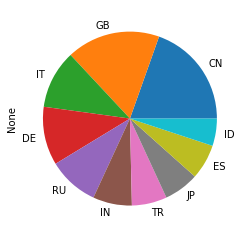

In [108]:
# Top 10 des pays ayant le plus d'airoport
aeroports.groupby('PAYS').size().sort_values(ascending=False).head(10).plot.pie()

## PRIX RETARD PREMIERE 10 MINUTES

Moyenne du prix des retards :  5173 $


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,PAYS,PRIX RETARD PREMIERE 10 MINUTES
292,IT,9877.0
160,MY,9773.0
145,UA,9757.0
128,CN,9753.0
93,UG,9744.0


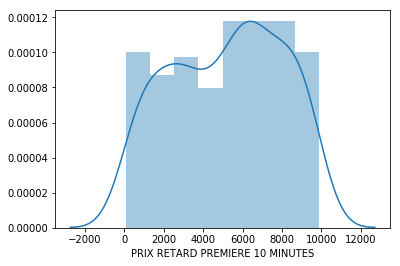

In [199]:
# top du prix des retards par pays 
print("Moyenne du prix des retards : ",int(aeroports['PRIX RETARD PREMIERE 10 MINUTES'].mean()),"$")
sns.distplot(aeroports['PRIX RETARD PREMIERE 10 MINUTES'])
aeroports.sort_values(by='PRIX RETARD PREMIERE 10 MINUTES',ascending=False)[['PAYS','PRIX RETARD PREMIERE 10 MINUTES']].head()


Moyenne du prix des retards :  502 $


,PAYS,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
55,KR,995.0
295,DE,988.0
54,KR,984.0
104,SL,982.0
225,RO,977.0


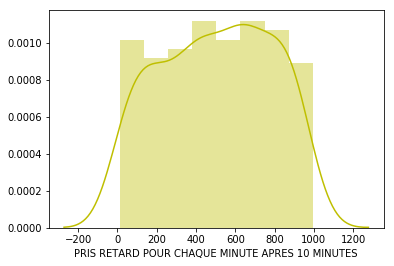

In [201]:
# top du prix des retards pour chaque minute par pays apres 10 min
print("Moyenne du prix des retards : ",int(aeroports['PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES'].mean()),"$")
sns.distplot(aeroports['PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES'],color="y")
aeroports.sort_values(by='PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES',ascending=False)[['PAYS','PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES']].head()


## Compagnies 


In [93]:
print("Shape : ",compagnies.shape)
print("NaN = ",compagnies.isna().sum().sum())
compagnies.head()

Shape :  (13, 2)
NaN =  1


,COMPAGNIE,CODE
0,Try Hard Airlines,THA
1,Corporate Overlord Airways,COA
2,Neverland Airlines,NaN
3,Always A Problem Flights,AAPF
4,Overpriced Air,OA


## Vols 

In [87]:
print(vols.shape)
vols.head()

(3000000, 30)


,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,235.0,220.0,205.0,1520,1841.0,6.0,1835,1847.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6/1/2018,10,NaN
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219.0,-7.0,14.0,2233.0,84.0,69.0,50.0,337,2323.0,5.0,2350,2328.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9/1/2016,10,THA
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719.0,-11.0,14.0,1733.0,71.0,66.0,45.0,252,1818.0,7.0,1841,1825.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2016,10,MAF


## NaN dans les données de vols 

In [94]:
vols_na = vols.isna().sum().to_frame().rename(columns={0:"NaN"})
vols_na['NaN%'] = round(vols_na['NaN'] * 100 / vols.shape[0],1) 
vols_na[vols_na['NaN'] != 0].sort_values(by="NaN%", ascending=False)

,NaN,NaN%
RAISON D'ANNULATION,2948414,98.3
RETARD METEO,2439769,81.3
RETARD AVION,2439769,81.3
RETARD COMPAGNIE,2439769,81.3
RETARD SECURITE,2439769,81.3
RETARD SYSTEM,2439769,81.3
COMPAGNIE AERIENNE,143045,4.8
RETARD A L'ARRIVEE,59585,2.0
TEMPS PASSE,59585,2.0
TEMPS DE VOL,59585,2.0
